In [13]:
import sys
import torch
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST, FashionMNIST

sys.path.insert(1, os.path.realpath(os.path.pardir))  # Add `code` dir to access `src`

from src.datamodules.mnist_utils import deskew_fn
from torchvision.transforms import transforms

data_dir = "../../data/"


In [15]:
trainset = MNIST(data_dir, train=True, transform=transforms.ToTensor())

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

In [17]:
deskewed = MNIST(data_dir, train=True, transform=transforms.Compose(
    [transforms.ToTensor(), transforms.Lambda(deskew_fn)]))

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

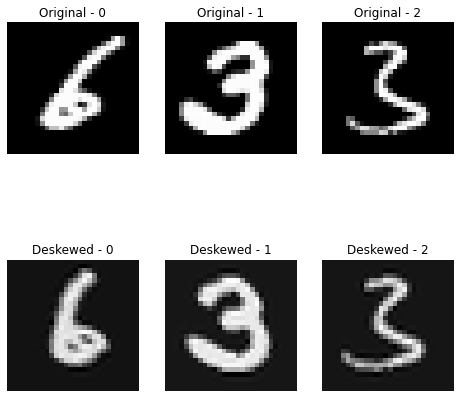

In [38]:
torch.manual_seed(12)
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 2
indices = []
for i in range(cols * rows):
    if i < cols:
        sample_idx = torch.randint(len(trainset), size=(1,)).item()
        indices.append(sample_idx)
        img, label = trainset[sample_idx]
        title = 'Original - {}'.format(sample_idx)
    else:
        # img = torch.tensor(deskew_fn(img))
        sample_idx = indices[i - cols]
        img, label = deskewed[sample_idx]
        img = (img - img.min()) / (img.max() - img.min())
        title = 'Deskewed - {}'.format(sample_idx)
    figure.add_subplot(rows, cols, i + 1)
    # plt.title(labels_map[label])
    plt.title(title)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()